# Problem Statement

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

Since our target variable(subscribed) is categorical in nature so we will be using classification method(Supervised learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
# loading test and train data
test_data=pd.read_csv('test.csv')
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
test_data.shape,train_data.shape

((13564, 17), (31647, 18))

In [5]:
# checking for missing data
train_data.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Analysing columns(Univariate analysis)

In [6]:
#Subscribe Column
a=train_data['subscribed'].value_counts()

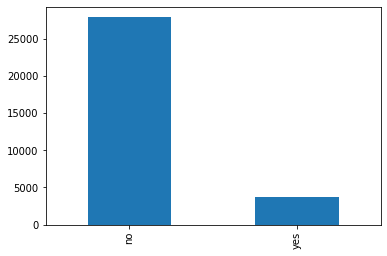

In [7]:
a.plot(kind='bar')

In [8]:
# job column
b=train_data['job'].value_counts()

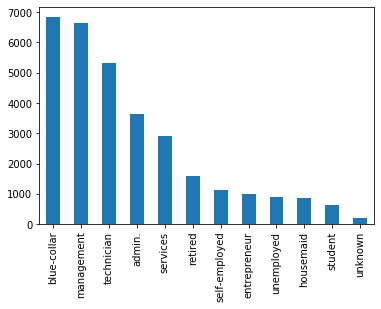

In [9]:
b.plot(kind='bar')

In [10]:
# Age variable
c=train_data['age']

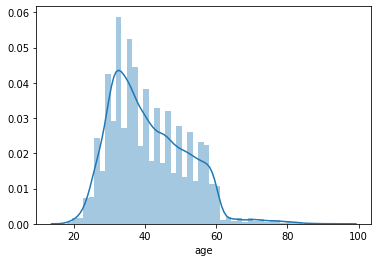

In [11]:
sns.distplot(c)

In [12]:
#default column
d=train_data['default'].value_counts()

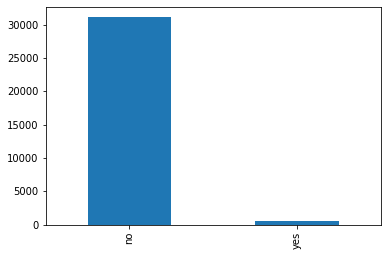

In [13]:
d.plot(kind='bar')

# Bivariate Analysis 

In [14]:
# generating cross table(for categorical) for better understanding of relationship between two column !!!!!!

e=pd.crosstab(train_data['default'],train_data['subscribed'])
print(e)

subscribed     no   yes
default                
no          27388  3674
yes           544    41


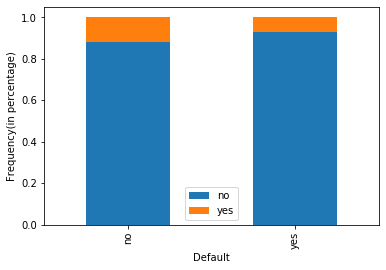

In [15]:
# visualisation 
e.div(e.sum(axis=1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Default')
plt.ylabel('Frequency(in percentage)')
plt.legend(loc='best')

In [16]:
f=pd.crosstab(train_data['job'],train_data['subscribed'])

In [17]:
f

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


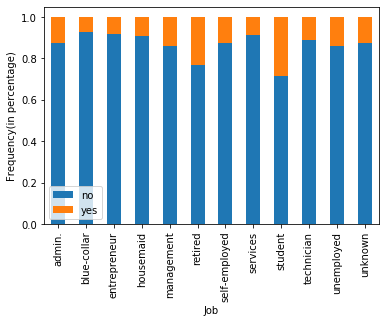

In [18]:
f.div(f.sum(axis=1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency(in percentage)')
plt.legend(loc='best')

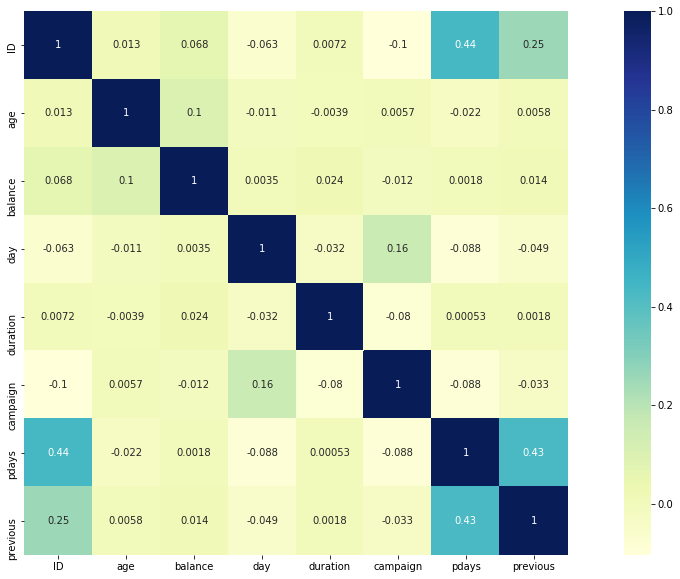

In [19]:
#correlation
q=train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(q,cmap='YlGnBu',square=True,annot=True)
# since correlation matrix is generated only for column containing numerical value
# so we will convert subscribe column into numrical column by replacing 'YES' and 'NO' column with 0 and 1.


In [20]:
train_data['subscribed'].replace('yes',1,inplace=True)

train_data['subscribed'].replace('no',0,inplace=True)

In [21]:
#train_data['subscribed']

In [22]:
X=train_data.drop(['subscribed'],axis=1)
# creating dummies for categorical data to convert them into indicator variable 
x=pd.get_dummies(X)

In [23]:
y=train_data['subscribed']

In [24]:
#splitting data into test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Logistic Regression

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred=lr.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.891785150078989

# Classification Report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5586
           1       0.61      0.22      0.32       744

    accuracy                           0.89      6330
   macro avg       0.76      0.60      0.63      6330
weighted avg       0.87      0.89      0.87      6330



# Confusion Matrix

In [29]:
print(confusion_matrix(y_test,y_pred))

[[5482  104]
 [ 581  163]]


# Decision Tree 

In [30]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=10,splitter='best')

In [31]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [32]:
y_predict=dt.predict(x_test)

In [33]:
accuracy_score(y_test,y_predict)

0.9083728278041074

# Classification Report

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5586
           1       0.72      0.36      0.48       744

    accuracy                           0.91      6330
   macro avg       0.82      0.67      0.72      6330
weighted avg       0.90      0.91      0.89      6330



# Confusion Matrix

In [35]:
print(confusion_matrix(y_test,y_predict))

[[5480  106]
 [ 474  270]]


# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rt=RandomForestClassifier(max_depth=4,n_estimators=60,min_samples_split=500,random_state=10,criterion='gini')

In [38]:
rt.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [39]:
y_rt=rt.predict(x_test)

In [40]:
accuracy_score(y_test,y_rt)

0.893522906793049

In [41]:
print(classification_report(y_test,y_rt))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5586
           1       0.86      0.11      0.20       744

    accuracy                           0.89      6330
   macro avg       0.88      0.56      0.57      6330
weighted avg       0.89      0.89      0.86      6330



In [42]:
print(confusion_matrix(y_test,y_rt))

[[5572   14]
 [ 660   84]]


# Ensemble Method(Gradient Boosting Classifier)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(max_depth=4,max_features='sqrt',subsample=0.8,
                               min_samples_split=200,min_samples_leaf=60,n_estimators=60,random_state=10)

In [44]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
y_gbc=gbc.predict(x_test)

In [46]:
accuracy_score(y_test,y_gbc)

0.9090047393364928

In [47]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5586
           1       0.71      0.38      0.49       744

    accuracy                           0.91      6330
   macro avg       0.82      0.68      0.72      6330
weighted avg       0.90      0.91      0.90      6330



In [48]:
print(confusion_matrix(y_test,y_gbc))

[[5473  113]
 [ 463  281]]


# Conclusion :: So from above mentioned algorithms Gradient Boosting classifier gives us the best accuracy score of 0.909. So for  the test data this model will be used

# Generating Result for Test Data !!!!!!


In [49]:
t_data=pd.get_dummies(test_data)

In [50]:
test_pred=gbc.predict(t_data)

# Creating final resultant Data for test Data !!!

In [51]:
submission=open('final.csv','w')
submission.write('ID')
submission.close()


In [59]:
new=pd.read_csv('final.csv')
new['ID']=t_data['ID']
new['subscribed']=test_pred

In [60]:
new.head(5)

,ID,subscribed
0,38441,0
1,40403,0
2,3709,0
3,37422,0
4,12527,0


In [61]:
new.size

27128

In [62]:
new['subscribed'].replace(1,'YES',inplace=True)
new['subscribed'].replace(0,'No',inplace=True)

In [63]:
new.head()

,ID,subscribed
0,38441,No
1,40403,No
2,3709,No
3,37422,No
4,12527,No


In [64]:
new.to_csv('final.csv',header=True,index=False)